In [105]:
#Data set
import pandas as pd

colors=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']

semestre = [8, 8, 10, 1, 2, 7, 5, 6, 3, 3]
edad = [19, 25, 30, 18, 20, 30, 22, 25, 29, 27]
promedio = [4.5, 4.4, 4.1, 4.2, 3.5, 2.6, 4.4, 2.6, 3.6, 1.0]

print(pd.DataFrame({"Semestre": semestre, "Edad" : edad, "Promedio": promedio}))


   Semestre  Edad  Promedio
0         8    19       4.5
1         8    25       4.4
2        10    30       4.1
3         1    18       4.2
4         2    20       3.5
5         7    30       2.6
6         5    22       4.4
7         6    25       2.6
8         3    29       3.6
9         3    27       1.0


In [106]:
#Normalizar

def _normalize(array):
    result = []
    xmin  = min(array)
    xmax = max(array)
    
    for i in array:
        x = (i - xmin)/(xmax - xmin)
        result.append(x)
    return result

x = _normalize(semestre)
y = _normalize(edad)
z = _normalize(promedio)

print(pd.DataFrame({"x": x, "y" : y, "z": z}))

          x         y         z
0  0.777778  0.083333  1.000000
1  0.777778  0.583333  0.971429
2  1.000000  1.000000  0.885714
3  0.000000  0.000000  0.914286
4  0.111111  0.166667  0.714286
5  0.666667  1.000000  0.457143
6  0.444444  0.333333  0.971429
7  0.555556  0.583333  0.457143
8  0.222222  0.916667  0.742857
9  0.222222  0.750000  0.000000


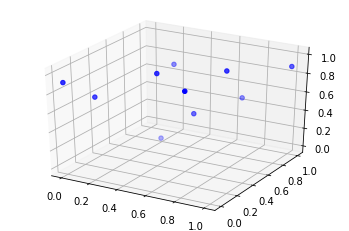

In [107]:
#Graficar

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

asignar=[]

for row in x:
    asignar.append(colors[0])

ax1.scatter(x, y, z, c=asignar, marker='o')

plt.show()

In [108]:
#Centroides inicales 
import random 


k1 = [random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)]
k2 = [random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)]

print("K1: ",k1)
print("K2: ",k2)




K1:  [0.8610501231843712, 0.6716558876440133, 0.08018949107205653]
K2:  [0.9050081022438676, 0.04266086991829243, 0.6484089084638079]


In [109]:
#Función Distancia euclidiana
import math
def _dEuclidiana(punto, centroide):
    result = 0  
    result = math.sqrt(math.pow((centroide[0]-punto[0]),2)+math.pow((centroide[1]-punto[1]),2)+math.pow((centroide[2]-punto[2]),2))
    return result

#print(_dEuclidiana([0.22, 0.75, 0.0],[0.3, 0.8, 0.4]))

In [110]:
#Hallar Distancia euclidiana para todos los puntos
distk1 = []
distk2 = []
cluster = []
for i in range(10):
    punto = [x[i], y[i],  z[i]]
    distk1.append(_dEuclidiana(punto, k1))
    distk2.append(_dEuclidiana(punto, k2))
    if distk1[i] < distk2[i]:
        cluster.append(1)
    else:
        cluster.append(2)
    
        
print(pd.DataFrame({"x": x, "y" : y, "z": z, "dk1": distk1, "dk2": distk2, "cluster": cluster}))

          x         y         z       dk1       dk2  cluster
0  0.777778  0.083333  1.000000  1.095038  0.376109        2
1  0.777778  0.583333  0.971429  0.899468  0.642539        2
2  1.000000  1.000000  0.885714  0.880901  0.990876        1
3  0.000000  0.000000  0.914286  1.374134  0.944219        2
4  0.111111  0.166667  0.714286  1.104310  0.806219        2
5  0.666667  1.000000  0.457143  0.536366  1.004932        1
6  0.444444  0.333333  0.971429  1.040351  0.633207        2
7  0.555556  0.583333  0.457143  0.493175  0.671585        1
8  0.222222  0.916667  0.742857  0.952502  1.113105        1
9  0.222222  0.750000  0.000000  0.648590  1.177692        1


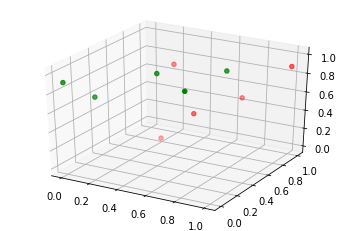

In [111]:
#Graficar puntos de acuerdo a su cluster
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

asignar=[]

for row in cluster:
    asignar.append(colors[row])

ax1.scatter(x, y, z, c=asignar, marker='o')

plt.show()

          x         y         z       dk1       dk2  oldCluster  cluster
0  0.777778  0.083333  1.000000  0.942885  0.395306           2        2
1  0.777778  0.583333  0.971429  0.587453  0.502180           2        2
2  1.000000  1.000000  0.885714  0.618478  0.960428           1        1
3  0.000000  0.000000  0.914286  1.082381  0.482407           2        2
4  0.111111  0.166667  0.714286  0.829177  0.375812           2        2
5  0.666667  1.000000  0.457143  0.207178  0.925479           1        1
6  0.444444  0.333333  0.971429  0.699344  0.117299           2        2
7  0.555556  0.583333  0.457143  0.272488  0.590980           1        1
8  0.222222  0.916667  0.742857  0.395126  0.732347           1        1
9  0.222222  0.750000  0.000000  0.604512  1.069048           1        1


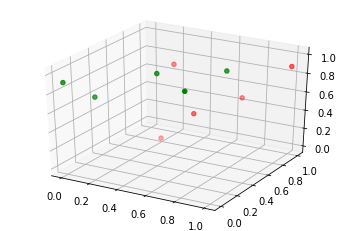

In [112]:
#Iteraciones

aux = 0
while aux == 0:
    #Variables k1
    contPuntosk1 = 0
    sumxk1 = 0
    sumyk1 = 0
    sumzk1 = 0

    #Variables k2
    contPuntosk2 = 0
    sumxk2 = 0
    sumyk2 = 0
    sumzk2 = 0

    #Recorrer  puntos
    for i in range(10):
        if(cluster[i] == 1):
            sumxk1 += x[i]
            sumyk1 += y[i]
            sumzk1 += z[i]
            contPuntosk1 += 1;
        else:
            sumxk2 += x[i]
            sumyk2 += y[i]
            sumzk2 += z[i]
            contPuntosk2 += 1; 

    #Nuevos centroides
    k1 = [sumxk1/contPuntosk1, sumyk1/contPuntosk1, sumzk1/contPuntosk1]
    k2 = [sumxk2/contPuntosk2, sumyk2/contPuntosk2, sumzk2/contPuntosk2]

    oldCluster = [0,0,0,0,0,0,0,0,0,0]

    #Hallar distancias
    distk1 = []
    distk2 = []
    for i in range(10):
        oldCluster[i] = cluster[i] 
        punto = [x[i], y[i],  z[i]]
        distk1.append(_dEuclidiana(punto, k1))
        distk2.append(_dEuclidiana(punto, k2))
        if distk1[i] < distk2[i]:
            cluster[i] = 1
        else:
            cluster[i] = 2

    print(pd.DataFrame({"x": x, "y" : y, "z": z, "dk1": distk1, "dk2": distk2, "oldCluster": oldCluster, "cluster": cluster}))

    #Graficar
    fig = plt.figure()
    ax1 = fig.add_subplot(111, projection='3d')

    asignar=[]

    for row in cluster:
        asignar.append(colors[row])

    ax1.scatter(x, y, z, c=asignar, marker='o')

    plt.show()
    
    cambios = 0
    #Validar si se tienen cambios
    for i in range(10):
        if oldCluster[i] != cluster[i]:
            cambios += 1
            break
             
    
    if(cambios > 0):
        aux = 0
    else:
        aux = 1
    
    
   